# **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np

#Libraries for Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Libraries for Spliting the dataset into Training set and Testing set
from sklearn.model_selection import train_test_split

#Libraries for Standardizing the features
from sklearn.preprocessing import StandardScaler

#Libraries for creating our model : Logistic Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO   #show leafs
from sklearn.tree import export_graphviz   #text on leafs and trees
import pydotplus  #build trees
from IPython.display import Image   #show final result

#Libraries for evaluating the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Libraries for creating our model : Logistic Regression
from sklearn.linear_model import LogisticRegression

# **Import the Dataset**

In [ ]:
data = pd.read_csv('SampleData_Eval.csv')
data

,Row,Drug 1 (mg),Drug 2 (mg),Main Disease Status,Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race
0,0,143.266667,154.600000,1,1,50,4,No Surgery,Former,30.0,B,Male,White/Caucasian
1,1,126.666667,157.033333,1,2,56,4,No Surgery,Never,0.0,B,Male,NaN
2,2,109.333333,118.266667,1,3,62,4,Site 1,Former,0.0,A,Male,NaN
3,3,104.533333,113.266667,1,2,66,4,No Surgery,Never,0.0,B,Male,White/Caucasian
4,4,95.700000,109.666667,1,2,61,3,Site 2,Never,0.0,B,Male,White/Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,NaN,96.533333,0,3,49,0,No Surgery,Never,0.0,B,Male,White/Caucasian
395,395,NaN,8.366667,0,2,71,0,Site 2,Former,25.0,B,Male,White/Caucasian
396,396,NaN,70.233333,0,2,61,0,No Surgery,Never,0.0,B,Female,White/Caucasian
397,397,NaN,10.500000,0,2,60,0,Site 1,Former,20.0,B,Male,White/Caucasian


In [ ]:
data1 = data.drop('Row', axis=1)
data1

,Drug 1 (mg),Drug 2 (mg),Main Disease Status,Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race
0,143.266667,154.600000,1,1,50,4,No Surgery,Former,30.0,B,Male,White/Caucasian
1,126.666667,157.033333,1,2,56,4,No Surgery,Never,0.0,B,Male,NaN
2,109.333333,118.266667,1,3,62,4,Site 1,Former,0.0,A,Male,NaN
3,104.533333,113.266667,1,2,66,4,No Surgery,Never,0.0,B,Male,White/Caucasian
4,95.700000,109.666667,1,2,61,3,Site 2,Never,0.0,B,Male,White/Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...
394,NaN,96.533333,0,3,49,0,No Surgery,Never,0.0,B,Male,White/Caucasian
395,NaN,8.366667,0,2,71,0,Site 2,Former,25.0,B,Male,White/Caucasian
396,NaN,70.233333,0,2,61,0,No Surgery,Never,0.0,B,Female,White/Caucasian
397,NaN,10.500000,0,2,60,0,Site 1,Former,20.0,B,Male,White/Caucasian


# **Pre-Processing**

# **Handle Categorical data**

In [ ]:
data1.dtypes

Drug 1 (mg)                          float64
Drug 2 (mg)                          float64
Main Disease Status                    int64
Family Size                            int64
Age                                    int64
Severity of the Relevant Disease       int64
Surgery                               object
Smoking Status                        object
Pack-year                            float64
Diet Type                             object
Gender                                object
Race                                  object
dtype: object

*We should encode the objects.*

In [ ]:
data1['Race'].unique()

array(['White/Caucasian', nan, 'Asian', 'Black or African American',
       'Other', 'Hispanic/Latino', 'other', 'African American/Black'],
      dtype=object)

In [ ]:
data1['Race'] = data1['Race'].replace(['other'], 'Other')

In [ ]:
# Mapping for encoding
category_mapping = {'White/Caucasian': 1, 'Asian': 2, 'Black or African American': 3, 'Hispanic/Latino': 4, 'African American/Black': 5, 'Other': 6}

# Replace and encode
data1['Race'] = data1['Race'].replace(category_mapping)

data1

,Drug 1 (mg),Drug 2 (mg),Main Disease Status,Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race
0,143.266667,154.600000,1,1,50,4,No Surgery,Former,30.0,B,Male,1.0
1,126.666667,157.033333,1,2,56,4,No Surgery,Never,0.0,B,Male,NaN
2,109.333333,118.266667,1,3,62,4,Site 1,Former,0.0,A,Male,NaN
3,104.533333,113.266667,1,2,66,4,No Surgery,Never,0.0,B,Male,1.0
4,95.700000,109.666667,1,2,61,3,Site 2,Never,0.0,B,Male,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,NaN,96.533333,0,3,49,0,No Surgery,Never,0.0,B,Male,1.0
395,NaN,8.366667,0,2,71,0,Site 2,Former,25.0,B,Male,1.0
396,NaN,70.233333,0,2,61,0,No Surgery,Never,0.0,B,Female,1.0
397,NaN,10.500000,0,2,60,0,Site 1,Former,20.0,B,Male,1.0


In [ ]:
# Mapping for encoding
category_mapping1 = {'Male': 1, 'Female': 2}

# Replace and encode
data1['Gender'] = data1['Gender'].replace(category_mapping1)

data1

,Drug 1 (mg),Drug 2 (mg),Main Disease Status,Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race
0,143.266667,154.600000,1,1,50,4,No Surgery,Former,30.0,B,1,1.0
1,126.666667,157.033333,1,2,56,4,No Surgery,Never,0.0,B,1,NaN
2,109.333333,118.266667,1,3,62,4,Site 1,Former,0.0,A,1,NaN
3,104.533333,113.266667,1,2,66,4,No Surgery,Never,0.0,B,1,1.0
4,95.700000,109.666667,1,2,61,3,Site 2,Never,0.0,B,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,NaN,96.533333,0,3,49,0,No Surgery,Never,0.0,B,1,1.0
395,NaN,8.366667,0,2,71,0,Site 2,Former,25.0,B,1,1.0
396,NaN,70.233333,0,2,61,0,No Surgery,Never,0.0,B,2,1.0
397,NaN,10.500000,0,2,60,0,Site 1,Former,20.0,B,1,1.0


In [ ]:
data1['Smoking Status'].unique()

array(['Former', 'Never', 'Current'], dtype=object)

For the Race feature we should handle the missing values by using median.

In [ ]:
# Mapping for encoding
category_mapping2 = {'Never': 1, 'Former': 2, 'Current': 3}

# Replace and encode
data1['Smoking Status'] = data1['Smoking Status'].replace(category_mapping2)

data1

,Drug 1 (mg),Drug 2 (mg),Main Disease Status,Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race
0,143.266667,154.600000,1,1,50,4,No Surgery,2,30.0,B,1,1.0
1,126.666667,157.033333,1,2,56,4,No Surgery,1,0.0,B,1,NaN
2,109.333333,118.266667,1,3,62,4,Site 1,2,0.0,A,1,NaN
3,104.533333,113.266667,1,2,66,4,No Surgery,1,0.0,B,1,1.0
4,95.700000,109.666667,1,2,61,3,Site 2,1,0.0,B,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,NaN,96.533333,0,3,49,0,No Surgery,1,0.0,B,1,1.0
395,NaN,8.366667,0,2,71,0,Site 2,2,25.0,B,1,1.0
396,NaN,70.233333,0,2,61,0,No Surgery,1,0.0,B,2,1.0
397,NaN,10.500000,0,2,60,0,Site 1,2,20.0,B,1,1.0


In [ ]:
data1['Diet Type'].unique()

array(['B', 'A', 'D', 'C', 'E'], dtype=object)

In [ ]:
# Mapping for encoding
category_mapping3 = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

# Replace and encode
data1['Diet Type'] = data1['Diet Type'].replace(category_mapping3)

data1

,Drug 1 (mg),Drug 2 (mg),Main Disease Status,Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race
0,143.266667,154.600000,1,1,50,4,No Surgery,2,30.0,2,1,1.0
1,126.666667,157.033333,1,2,56,4,No Surgery,1,0.0,2,1,NaN
2,109.333333,118.266667,1,3,62,4,Site 1,2,0.0,1,1,NaN
3,104.533333,113.266667,1,2,66,4,No Surgery,1,0.0,2,1,1.0
4,95.700000,109.666667,1,2,61,3,Site 2,1,0.0,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,NaN,96.533333,0,3,49,0,No Surgery,1,0.0,2,1,1.0
395,NaN,8.366667,0,2,71,0,Site 2,2,25.0,2,1,1.0
396,NaN,70.233333,0,2,61,0,No Surgery,1,0.0,2,2,1.0
397,NaN,10.500000,0,2,60,0,Site 1,2,20.0,2,1,1.0


In [ ]:
data1['Surgery'].unique()

array(['No Surgery', 'Site 1', 'Site 2', 'Site 4', 'Site 3'], dtype=object)

In [ ]:
# Mapping for encoding
category_mapping4 = {'Site 1': 1, 'Site 2': 2, 'Site 3': 3, 'Site 4': 4, 'No Surgery': 5}

# Replace and encode
data1['Surgery'] = data1['Surgery'].replace(category_mapping4)

data1

,Drug 1 (mg),Drug 2 (mg),Main Disease Status,Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race
0,143.266667,154.600000,1,1,50,4,5,2,30.0,2,1,1.0
1,126.666667,157.033333,1,2,56,4,5,1,0.0,2,1,NaN
2,109.333333,118.266667,1,3,62,4,1,2,0.0,1,1,NaN
3,104.533333,113.266667,1,2,66,4,5,1,0.0,2,1,1.0
4,95.700000,109.666667,1,2,61,3,2,1,0.0,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,NaN,96.533333,0,3,49,0,5,1,0.0,2,1,1.0
395,NaN,8.366667,0,2,71,0,2,2,25.0,2,1,1.0
396,NaN,70.233333,0,2,61,0,5,1,0.0,2,2,1.0
397,NaN,10.500000,0,2,60,0,1,2,20.0,2,1,1.0


In [ ]:
data1.dtypes

Drug 1 (mg)                          float64
Drug 2 (mg)                          float64
Main Disease Status                    int64
Family Size                            int64
Age                                    int64
Severity of the Relevant Disease       int64
Surgery                                int64
Smoking Status                         int64
Pack-year                            float64
Diet Type                              int64
Gender                                 int64
Race                                 float64
dtype: object

# **Handle Missing values**

In [ ]:
data1.isnull().sum()

Drug 1 (mg)                          234
Drug 2 (mg)                            1
Main Disease Status                    0
Family Size                            0
Age                                    0
Severity of the Relevant Disease       0
Surgery                                0
Smoking Status                         0
Pack-year                              0
Diet Type                              0
Gender                                 0
Race                                  67
dtype: int64

We have 234 missing values for Drug 1 which is very large amount in comparison with the total records of the dataset. So we can't drop them and we should **Impute** them (Imputation involves filling in the missing values with estimated or predicted values).

Because the Dosage of the drugs are the critical features and changing them would affect our model, I decide to put 0 wherever the dosage for Drug 1 and 2 are missed with fillna metthod.




We try to fill the missing values for Drug 1 & 2 with their average but the covariance between these features and the target value become decreased incomparison with filling them with 0. so we fill them with zer.

In [ ]:
#Replace the missing value with '0' using 'fiilna' method
data1['Drug 1 (mg)'] = data1['Drug 1 (mg)'].fillna(0)
data1['Drug 2 (mg)'] = data1['Drug 2 (mg)'].fillna(0)
data1.isnull().sum()

Drug 1 (mg)                           0
Drug 2 (mg)                           0
Main Disease Status                   0
Family Size                           0
Age                                   0
Severity of the Relevant Disease      0
Surgery                               0
Smoking Status                        0
Pack-year                             0
Diet Type                             0
Gender                                0
Race                                 67
dtype: int64

In [ ]:
data1['Race'].value_counts()

1.0    293
4.0     19
3.0      8
2.0      5
5.0      4
6.0      3
Name: Race, dtype: int64

The mode of Race is : **White/Caucasian**, So we replace the missing values with White/Caucasian

In [ ]:
data1['Race'] = data1['Race'].fillna(1.0)
data1.isnull().sum()

Drug 1 (mg)                          0
Drug 2 (mg)                          0
Main Disease Status                  0
Family Size                          0
Age                                  0
Severity of the Relevant Disease     0
Surgery                              0
Smoking Status                       0
Pack-year                            0
Diet Type                            0
Gender                               0
Race                                 0
dtype: int64

# **Handle Duplicated Data**

In [ ]:
data1.duplicated().sum()

0

# **Handle Outliers**

<Axes: >

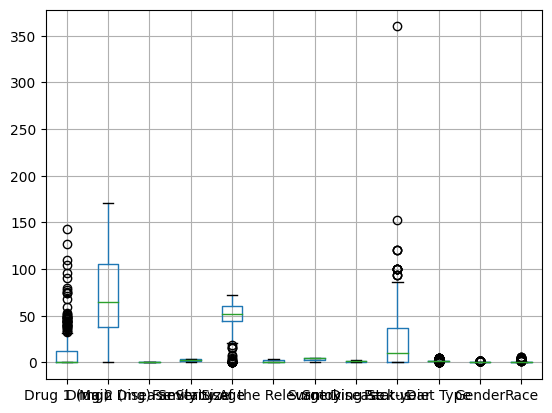

In [ ]:
data1.boxplot()

<Axes: >

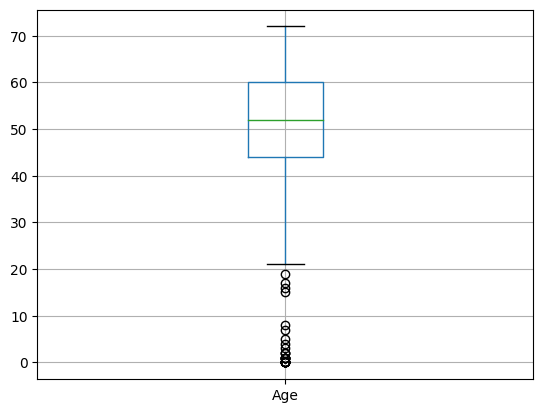

In [ ]:
data1.iloc[:,[4]].boxplot()

In [ ]:
Q1 = data1.iloc[:,4].quantile(0.25)
Q3 = data1.iloc[:,4].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

20.0 84.0


In [ ]:
data1[data1['Age'] < 20.0].shape

(29, 12)

29 of the records are outliers because it is a small number we can delete them.

In [ ]:
data2 = data1[data1['Age'] >= 20.0].reset_index().drop('index', axis = 1)
data2

,Drug 1 (mg),Drug 2 (mg),Main Disease Status,Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race
0,143.266667,154.600000,1,1,50,4,5,2,30.0,2,1,1.0
1,126.666667,157.033333,1,2,56,4,5,1,0.0,2,1,1.0
2,109.333333,118.266667,1,3,62,4,1,2,0.0,1,1,1.0
3,104.533333,113.266667,1,2,66,4,5,1,0.0,2,1,1.0
4,95.700000,109.666667,1,2,61,3,2,1,0.0,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.000000,96.533333,0,3,49,0,5,1,0.0,2,1,1.0
366,0.000000,8.366667,0,2,71,0,2,2,25.0,2,1,1.0
367,0.000000,70.233333,0,2,61,0,5,1,0.0,2,2,1.0
368,0.000000,10.500000,0,2,60,0,1,2,20.0,2,1,1.0


Moving the **target value** which is "**Main Disease Status**" to the end

In [ ]:
data2 = data2[[col for col in data2.columns if col != 'Main Disease Status'] + ['Main Disease Status']]
data2

,Drug 1 (mg),Drug 2 (mg),Family Size,Age,Severity of the Relevant Disease,Surgery,Smoking Status,Pack-year,Diet Type,Gender,Race,Main Disease Status
0,143.266667,154.600000,1,50,4,5,2,30.0,2,1,1.0,1
1,126.666667,157.033333,2,56,4,5,1,0.0,2,1,1.0,1
2,109.333333,118.266667,3,62,4,1,2,0.0,1,1,1.0,1
3,104.533333,113.266667,2,66,4,5,1,0.0,2,1,1.0,1
4,95.700000,109.666667,2,61,3,2,1,0.0,2,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.000000,96.533333,3,49,0,5,1,0.0,2,1,1.0,0
366,0.000000,8.366667,2,71,0,2,2,25.0,2,1,1.0,0
367,0.000000,70.233333,2,61,0,5,1,0.0,2,2,1.0,0
368,0.000000,10.500000,2,60,0,1,2,20.0,2,1,1.0,0


# **Feature Selection**

**Filter**

In [ ]:
#Target Value: Main Disease Status
X = data2.iloc[:,:-1]
Y = data2.iloc[:,-1]

#Apply SelectKBest class to select top n features
bestfeatures = SelectKBest(score_func = f_regression, k = 11)       #score_func = f_regression    for Regression Analysis
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Concatenating two mentioned dataframes for better displaying
featurescores = pd.concat([dfcolumns,dfscores], axis = 1)
featurescores.columns = ["feature_name","feature_score"]
print(featurescores.nlargest(12, "feature_score"))

                         feature_name  feature_score
4   Severity of the Relevant Disease     1671.186776
0                         Drug 1 (mg)     208.013520
3                                 Age      76.084676
9                              Gender       5.409723
5                             Surgery       1.713836
7                           Pack-year       0.415123
10                               Race       0.214949
1                         Drug 2 (mg)       0.181346
2                         Family Size       0.165365
6                      Smoking Status       0.085864
8                           Diet Type       0.017639


Irrelevant or partially relevant features can negatively impact model performance. So we used Filter method to select the features.

As a result we should select a subset of the most important features based on their scores, and use them for training the predictive model.

Severity of the Relevant Disease achieves the higher scores and it shows that it affects the target value the most and can results in overfitting so we should not consider this feature.

We select
1. Drug 1 (mg)
2. Age
3. Gender

# **Split the data into training and testing sets**

In [ ]:
X1 = data2.iloc[:,[3,9,5]]
Y1 = data2.iloc[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

# **Creating Our Model: Decision Tree**

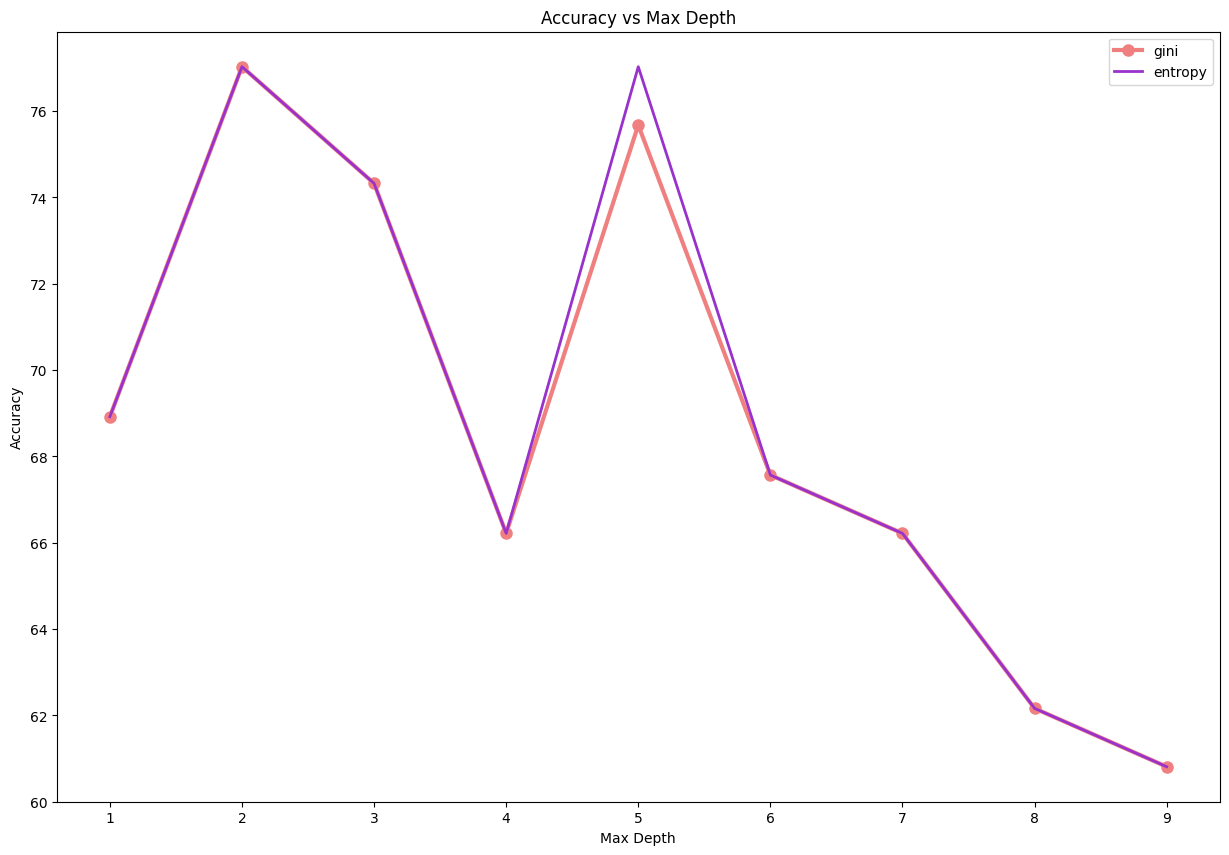

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1, 10):
    dtree = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    dtree.fit(X_train, Y_train)
    dtree_pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(Y_test, dtree_pred) * 100)

    dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    dtree.fit(X_train, Y_train)
    dtree_pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(Y_test, dtree_pred) * 100)

    max_depth.append(i)


df = pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth), })

fig = plt.figure(figsize = (15, 10))
plt.plot('max_depth', 'acc_gini', data = df, label = 'gini', marker = 'o', markerfacecolor = 'lightcoral', markersize = 8, color = 'lightcoral', linewidth = 3)
plt.plot('max_depth', 'acc_entropy', data = df, label = 'entropy', marker = '', color = 'darkorchid', linewidth = 2)

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.xticks([j for j in range(1, 10)])
plt.legend()
plt.show()

In [ ]:
DT_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
DT_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
y_t_pred = DT_model.predict(X_test)

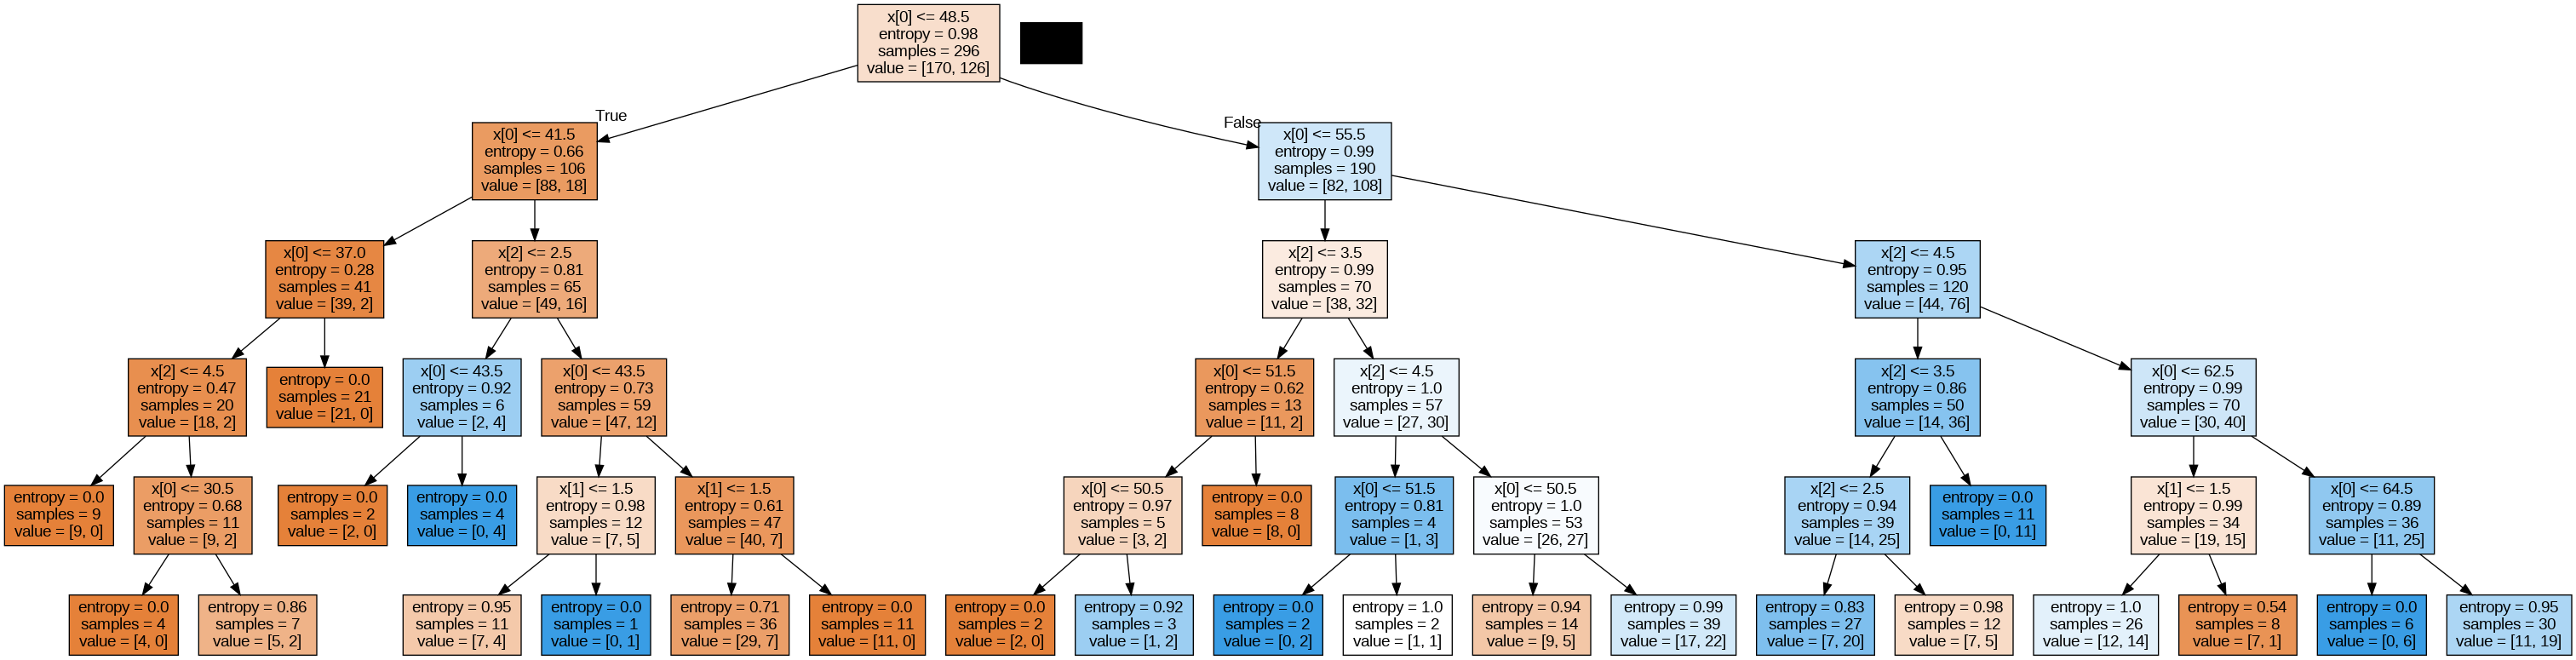

In [ ]:
dot_data = StringIO()
export_graphviz(DT_model, out_file = dot_data, filled = True, precision = 2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# **Evaluation of Decision Tree Algorithm**

**Confusion Matrix**

In [ ]:
confusion_matrix(Y_test, y_t_pred)

array([[25, 11],
       [ 6, 32]])

The confusion matrix revealed that:
True Negative (TN): 25
Instances where the model correctly predicted that the main disease did not appear.

False Positive (FP): 11
Instances where the model incorrectly predicted that the main disease appeared, but it did not.

False Negative (FN): 6
Instances where the model incorrectly predicted that the main disease did not appear, but it did.

True Positive (TP): 32
Instances where the model correctly predicted that the main disease appeared.

**Accuracy Score**

In [ ]:
accuracy_score(Y_test, y_t_pred)

0.7702702702702703

*Accuracy = (TP + TN) / (TP + TN + FP + FN)*

**Precision and Recall**

In [ ]:
precision_score(Y_test, y_t_pred)

0.7441860465116279

Results: The precision score of the model was 73.53%, which means that out of all the patients who were classified as main disease appeared at the end of the study, 73.53% of them actually preferred it. This is a very good result.

In [ ]:
recall_score(Y_test, y_t_pred)

0.8421052631578947

**AUC Score**

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_t_pred)
auc = roc_auc_score(Y_test, y_t_pred)
auc

0.7682748538011696

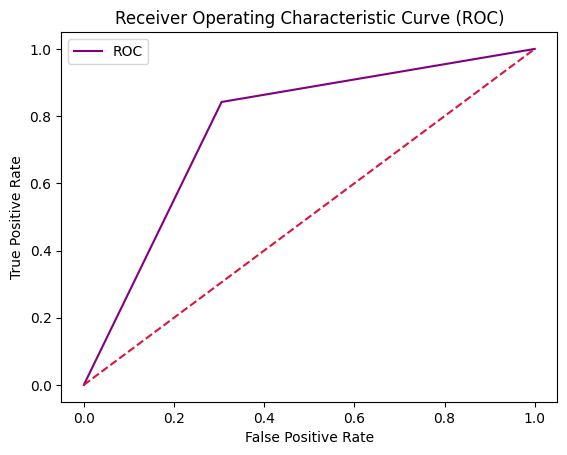

In [ ]:
plt.plot(fpr, tpr, color = 'Purple', label = 'ROC')
plt.plot([0,1], [0,1], color = 'crimson', linestyle = '--')
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend()
plt.show()

# **Creating our model: Linear regression**

# **Split the data into training and testing sets**

In [ ]:
X2 = data2.iloc[:,[5,3,9]]
Y2 = data2.iloc[:,-1]

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X2, Y2, test_size=0.35, random_state=0)

In [ ]:
# Create train data
df_train1 = pd.concat([X_train1, Y_train1], axis = 1)

# Create test data
df_test1 = pd.concat([X_test1, Y_test1], axis = 1)

# Create validation data
valid_train1 = df_train1.sample(n = 30)
valid_test1 = df_test1.sample(n = 13)

# Final result
df_valid1 = pd.concat([valid_train1, valid_test1], axis = 0).reset_index().drop("index", axis = 1)

In [ ]:
x_train1 = df_train1.iloc[:,:-1]
y_train1 = df_train1.iloc[:,-1]
x_test1 = df_test1.iloc[:,:-1]
y_test1 = df_test1.iloc[:,-1]
x_valid1 = df_valid1.iloc[:,:-1]
y_valid1 = df_valid1.iloc[:,-1]

# **Standardizing the deatures**

In [ ]:
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(x_train1)
X_test_scaled1 = scaler.transform(x_test1)

# **Creating Our Model: Logistic Regression**

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train_scaled1, y_train1)

LogisticRegression()

In [ ]:
# Make predictions
y_t_pred1 = model1.predict_proba(X_test_scaled1)[:, 1]  # Probability of positive class

In [ ]:
y_v_pred1 = model1.predict_proba(x_valid1)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# **Evaluation of Algorithm**

**AUC Score**

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_t_pred1)
auc1 = roc_auc_score(y_test1, y_t_pred1)
auc1

0.7924685198384415

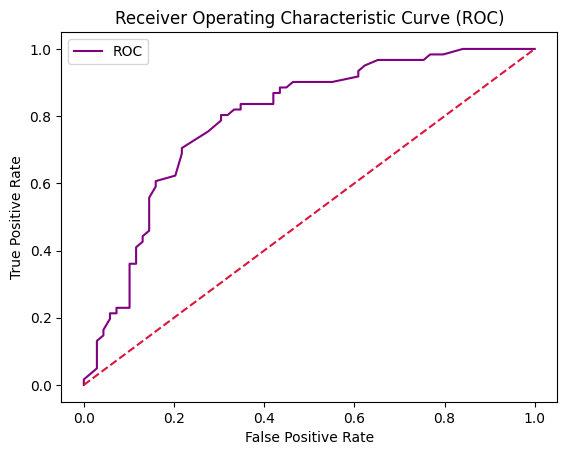

In [ ]:
plt.plot(fpr1, tpr1, color = 'Purple', label = 'ROC')
plt.plot([0,1], [0,1], color = 'crimson', linestyle = '--')
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend()
plt.show()